<a href="https://colab.research.google.com/github/TheOX7/Market-Basket-Analysis-e-Commerce/blob/main/Market_Basket_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Persiapan Data#

In [2]:
data=pd.read_excel('data_transaksi_retail.xlsx')

In [3]:
data

,Kode Transaksi,Nama Barang,Quantity
0,#1,Kaos,1
1,#1,Shampo Biasa,1
2,#1,Sepatu Sport merk Z,1
3,#1,Serum Vitamin,1
4,#1,Baju Renang Pria Dewasa,1
...,...,...,...
33663,#3450,Flat Shoes Ballerina,1
33664,#3450,Sepatu Sandal Anak,1
33665,#3450,Sepatu Kulit Casual,1
33666,#3450,Celana Jogger Casual,1


In [4]:
data_basket = (data.groupby(['Kode Transaksi', 'Nama Barang'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('Kode Transaksi'))

In [5]:
data_basket

Nama Barang,Atasan Baju Belang,Atasan Kaos Putih,Baju Batik Wanita,Baju Kaos Anak - Karakter Kartun,Baju Kaos Anak - Superheroes,Baju Kaos Olahraga,Baju Kemeja Putih,Baju Renang Anak Perempuan,Baju Renang Pria Anak-anak,Baju Renang Pria Dewasa,...,Tas Multifungsi,Tas Pinggang Wanita,Tas Ransel Mini,Tas Sekolah Anak Laki-laki,Tas Sekolah Anak Perempuan,Tas Tangan,Tas Travel,Tas Waist Bag,Wedges Hitam,Woman Ripped Jeans
Kode Transaksi,,,,,,,,,,,,,,,,,,,,,
#1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
#100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
#996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
#997,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

data_sets = data_basket.applymap(encode_units)
data_sets

Nama Barang,Atasan Baju Belang,Atasan Kaos Putih,Baju Batik Wanita,Baju Kaos Anak - Karakter Kartun,Baju Kaos Anak - Superheroes,Baju Kaos Olahraga,Baju Kemeja Putih,Baju Renang Anak Perempuan,Baju Renang Pria Anak-anak,Baju Renang Pria Dewasa,...,Tas Multifungsi,Tas Pinggang Wanita,Tas Ransel Mini,Tas Sekolah Anak Laki-laki,Tas Sekolah Anak Perempuan,Tas Tangan,Tas Travel,Tas Waist Bag,Wedges Hitam,Woman Ripped Jeans
Kode Transaksi,,,,,,,,,,,,,,,,,,,,,
#1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
#10,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
#100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#1000,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
#1001,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#995,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
#996,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
#997,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Memahami Metrics

In [7]:
frequent_itemsets = apriori(data_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.016232,(Atasan Baju Belang)
1,0.118841,(Atasan Kaos Putih)
2,0.380290,(Baju Batik Wanita)
3,0.121159,(Baju Kaos Anak - Karakter Kartun)
4,0.115942,(Baju Kaos Anak - Superheroes)
...,...,...
9087,0.012754,"(Sunblock Cream, Tas Pinggang Wanita, Serum Vi..."
9088,0.010725,"(Baju Kemeja Putih, Baju Renang Pria Dewasa, A..."
9089,0.011594,"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T..."
9090,0.011594,"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T..."


In [8]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Atasan Baju Belang),(Sweater Top Panjang),0.016232,0.174493,0.010435,0.642857,3.684148,0.007602,2.311420
1,(Sweater Top Panjang),(Atasan Baju Belang),0.174493,0.016232,0.010435,0.059801,3.684148,0.007602,1.046340
2,(Atasan Kaos Putih),(Baju Batik Wanita),0.118841,0.380290,0.037391,0.314634,0.827354,-0.007803,0.904203
3,(Baju Batik Wanita),(Atasan Kaos Putih),0.380290,0.118841,0.037391,0.098323,0.827354,-0.007803,0.977245
4,(Baju Kemeja Putih),(Atasan Kaos Putih),0.363768,0.118841,0.041159,0.113147,0.952094,-0.002071,0.993580
...,...,...,...,...,...,...,...,...,...
91709,(Tank Top),"(Baju Renang Pria Dewasa, Atasan Kaos Putih, G...",0.171594,0.015652,0.015072,0.087838,5.611862,0.012387,1.079137
91710,(Gembok Koper),"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T...",0.111884,0.015652,0.015072,0.134715,8.606793,0.013321,1.137600
91711,(Wedges Hitam),"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T...",0.246087,0.015072,0.015072,0.061249,4.063604,0.011363,1.049189
91712,(Tas Travel),"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T...",0.220870,0.015652,0.015072,0.068241,4.359872,0.011615,1.056441


In [9]:
frequent_itemsets['k'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

## Metric Support

In [10]:
frequent_itemsets.sort_values('support')

,support,itemsets,k
2220,0.010145,"(Baju Kaos Olahraga, Tas Travel, Shampo Biasa)",3
4877,0.010145,"(Sepatu Sport merk Z, Kaos, Hair Dryer)",3
5488,0.010145,"(Atasan Kaos Putih, Serum Vitamin, Baju Batik ...",4
7259,0.010145,"(Celana Jeans Sobek Wanita, Celana Pendek Jean...",4
4133,0.010145,"(Wedges Hitam, Celana Tactical , Dompet Card H...",3
...,...,...,...
12,0.329275,(Celana Jogger Casual),1
6,0.363768,(Baju Kemeja Putih),1
2,0.380290,(Baju Batik Wanita),1
43,0.488406,(Serum Vitamin),1


In [11]:
rules.sort_values('support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82370,"(Sepatu Sandal Anak, Serum Vitamin, Sepatu Sek...","(Celana Pendek Jeans, Blouse Denim)",0.056812,0.038261,0.010145,0.178571,4.667208,0.007971,1.170813
61318,"(Celana Tactical , Shampo Biasa)","(Wedges Hitam, Tali Pinggang Gesper Pria)",0.115652,0.077101,0.010145,0.087719,1.137713,0.001228,1.011639
61317,"(Celana Tactical , Tali Pinggang Gesper Pria)","(Wedges Hitam, Shampo Biasa)",0.047246,0.146087,0.010145,0.214724,1.469836,0.003243,1.087405
61316,"(Wedges Hitam, Shampo Biasa)","(Celana Tactical , Tali Pinggang Gesper Pria)",0.146087,0.047246,0.010145,0.069444,1.469836,0.003243,1.023855
61315,"(Wedges Hitam, Tali Pinggang Gesper Pria)","(Celana Tactical , Shampo Biasa)",0.077101,0.115652,0.010145,0.131579,1.137713,0.001228,1.018340
...,...,...,...,...,...,...,...,...,...
475,(Shampo Biasa),(Baju Kemeja Putih),0.601449,0.363768,0.243768,0.405301,1.114175,0.024980,1.069839
154,(Baju Batik Wanita),(Shampo Biasa),0.380290,0.601449,0.246377,0.647866,1.077175,0.017652,1.131815
155,(Shampo Biasa),(Baju Batik Wanita),0.601449,0.380290,0.246377,0.409639,1.077175,0.017652,1.049713
2117,(Shampo Biasa),(Serum Vitamin),0.601449,0.488406,0.316232,0.525783,1.076529,0.022481,1.078819


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


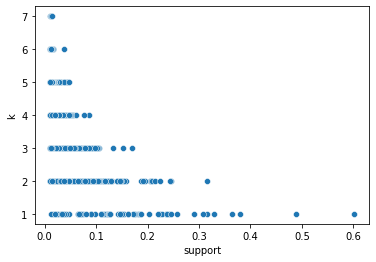

In [12]:
sns.scatterplot('support','k', data=frequent_itemsets)

semakin tinggi nilai support, nilai k semakin kecil

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


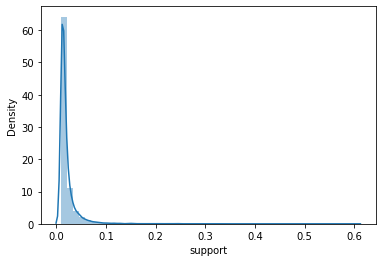

In [13]:
sns.distplot(frequent_itemsets['support'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


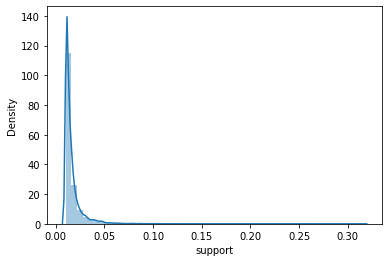

In [14]:
sns.distplot(rules['support'])

semakin tinggi nilai support, variasi rules yang diberikan akan semakin kecil

## Metric Confidence

In [15]:
rules.sort_values('confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40589,(Shampo Biasa),"(Baju Kaos Olahraga, Dompet Card Holder, Cover...",0.601449,0.019710,0.010145,0.016867,0.855776,-0.001710,0.997109
34625,(Shampo Biasa),"(Tank Top, Celana Pendek Jeans, Baju Batik Wan...",0.601449,0.017101,0.010145,0.016867,0.986318,-0.000141,0.999762
52447,(Shampo Biasa),"(Celana Jeans Sobek Wanita, Celana Jogger Casu...",0.601449,0.011014,0.010145,0.016867,1.531389,0.003520,1.005953
52573,(Shampo Biasa),"(Celana Jeans Sobek Wanita, Celana Pendek Casu...",0.601449,0.011014,0.010145,0.016867,1.531389,0.003520,1.005953
25199,(Shampo Biasa),"(Sepatu Sport merk Y, Jeans Jumbo)",0.601449,0.022029,0.010145,0.016867,0.765694,-0.003104,0.994750
...,...,...,...,...,...,...,...,...,...
82576,"(Dompet Card Holder, Blouse Denim, Sepatu Seko...",(Serum Vitamin),0.010435,0.488406,0.010435,1.000000,2.047478,0.005338,inf
70244,"(Dompet STNK Gantungan, Atasan Kaos Putih, Tas...",(Sepatu Sport merk Z),0.011594,0.257391,0.011594,1.000000,3.885135,0.008610,inf
82694,"(Hair Dryer, Blouse Denim, Sepatu Sekolah Hita...",(Sepatu Sandal Anak),0.011014,0.307826,0.011014,1.000000,3.248588,0.007624,inf
70182,"(Dompet STNK Gantungan, Atasan Kaos Putih, Sep...",(Tas Ransel Mini),0.011594,0.162319,0.011594,1.000000,6.160714,0.009712,inf


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


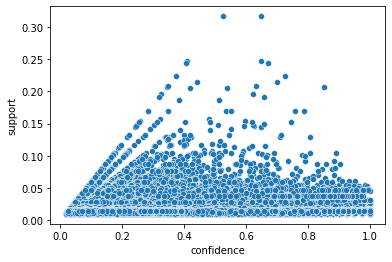

In [16]:
# confidence vs support
sns.scatterplot('confidence','support', data=rules)

## Metric Lift

In [17]:
rules.sort_values('lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38919,"(Baju Batik Wanita, Shampo Biasa)","(Wedges Hitam, Tas Travel)",0.246377,0.079420,0.010435,0.042353,0.533276,-0.009133,0.961293
38914,"(Wedges Hitam, Tas Travel)","(Baju Batik Wanita, Shampo Biasa)",0.079420,0.246377,0.010435,0.131387,0.533276,-0.009133,0.867617
21049,"(Serum Vitamin, Sepatu Sekolah Hitam W)",(Cover Koper),0.061159,0.314783,0.010435,0.170616,0.542013,-0.008817,0.826176
21052,(Cover Koper),"(Serum Vitamin, Sepatu Sekolah Hitam W)",0.314783,0.061159,0.010435,0.033149,0.542013,-0.008817,0.971029
20968,(Cover Koper),"(Sepatu Sandal Anak, Sepatu Sekolah Hitam W)",0.314783,0.060580,0.010435,0.033149,0.547199,-0.008635,0.971629
...,...,...,...,...,...,...,...,...,...
91164,"(Tas Pinggang Wanita, Tas Travel, Serum Vitami...","(Sunblock Cream, Kuas Makeup )",0.015942,0.018261,0.012754,0.800000,43.809524,0.012463,4.908696
91181,"(Tas Pinggang Wanita, Serum Vitamin, Kuas Make...","(Tas Travel, Sunblock Cream, Dompet Flip Cover)",0.017681,0.015942,0.012754,0.721311,45.245902,0.012472,3.531032
91187,"(Tas Travel, Serum Vitamin, Kuas Makeup )","(Tas Pinggang Wanita, Sunblock Cream, Dompet F...",0.017681,0.015942,0.012754,0.721311,45.245902,0.012472,3.531032
91176,"(Tas Travel, Sunblock Cream, Dompet Flip Cover)","(Tas Pinggang Wanita, Serum Vitamin, Kuas Make...",0.015942,0.017681,0.012754,0.800000,45.245902,0.012472,4.911594


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


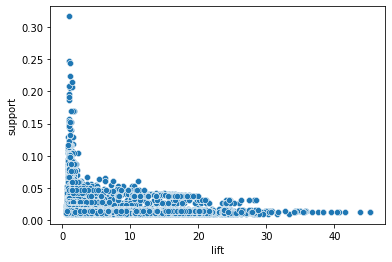

In [18]:
# lift vs support
sns.scatterplot('lift','support', data=rules)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


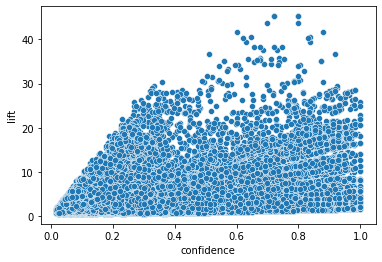

In [19]:
# confidence vs lift
sns.scatterplot('confidence','lift', data=rules)

## Metric Leverage

In [20]:
rules.sort_values('leverage')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2201,(Shampo Biasa),(Tas Travel),0.601449,0.220870,0.116812,0.194217,0.879328,-0.016030,0.966923
2200,(Tas Travel),(Shampo Biasa),0.220870,0.601449,0.116812,0.528871,0.879328,-0.016030,0.845949
165,(Baju Batik Wanita),(Tank Top),0.380290,0.171594,0.049275,0.129573,0.755114,-0.015980,0.951724
164,(Tank Top),(Baju Batik Wanita),0.171594,0.380290,0.049275,0.287162,0.755114,-0.015980,0.869356
1265,(Cover Koper),(Sepatu Sandal Anak),0.314783,0.307826,0.081159,0.257827,0.837573,-0.015739,0.932631
...,...,...,...,...,...,...,...,...,...
807,(Shampo Biasa),(Celana Jeans Sobek Wanita),0.601449,0.241739,0.206087,0.342651,1.417440,0.060693,1.153513
2007,(Serum Vitamin),(Sepatu Sandal Anak),0.488406,0.307826,0.215072,0.440356,1.430535,0.064728,1.236811
2006,(Sepatu Sandal Anak),(Serum Vitamin),0.307826,0.488406,0.215072,0.698682,1.430535,0.064728,1.697853
25923,(Sepatu Sandal Anak),"(Serum Vitamin, Shampo Biasa)",0.307826,0.316232,0.169275,0.549906,1.738932,0.071931,1.519167


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


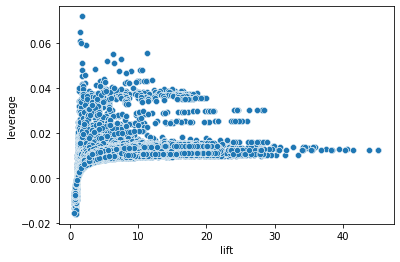

In [21]:
# lift vs leverage
sns.scatterplot('lift','leverage', data=rules)

# Pemilihan Association Rules

## Melihat karakteristik dari pemilihan nilai minimum support

Kita akan melihat seperti apa kumpulan frequent itemset yang dihasilkan untuk berbagai nilai minimum support

In [22]:
frequent_itemsets = apriori(data_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.016232,(Atasan Baju Belang)
1,0.118841,(Atasan Kaos Putih)
2,0.380290,(Baju Batik Wanita)
3,0.121159,(Baju Kaos Anak - Karakter Kartun)
4,0.115942,(Baju Kaos Anak - Superheroes)
...,...,...
9087,0.012754,"(Sunblock Cream, Tas Pinggang Wanita, Serum Vi..."
9088,0.010725,"(Baju Kemeja Putih, Baju Renang Pria Dewasa, A..."
9089,0.011594,"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T..."
9090,0.011594,"(Baju Renang Pria Dewasa, Atasan Kaos Putih, T..."


In [23]:
frequent_itemsets = apriori(data_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.118841,(Atasan Kaos Putih)
1,0.380290,(Baju Batik Wanita)
2,0.121159,(Baju Kaos Anak - Karakter Kartun)
3,0.115942,(Baju Kaos Anak - Superheroes)
4,0.089275,(Baju Kaos Olahraga)
...,...,...
452,0.055362,"(Baju Kemeja Putih, Celana Jeans Sobek Wanita,..."
453,0.077101,"(Baju Kemeja Putih, Sepatu Sandal Anak, Serum ..."
454,0.053043,"(Sepatu Sandal Anak, Serum Vitamin, Blouse Den..."
455,0.060290,"(Sepatu Sandal Anak, Serum Vitamin, Blouse Den..."


In [24]:
frequent_itemsets = apriori(data_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.118841,(Atasan Kaos Putih)
1,0.380290,(Baju Batik Wanita)
2,0.121159,(Baju Kaos Anak - Karakter Kartun)
3,0.115942,(Baju Kaos Anak - Superheroes)
4,0.363768,(Baju Kemeja Putih)
...,...,...
98,0.132754,"(Baju Kemeja Putih, Serum Vitamin, Shampo Biasa)"
99,0.105217,"(Celana Jeans Sobek Wanita, Tali Pinggang Gesp..."
100,0.102899,"(Celana Jogger Casual, Serum Vitamin, Shampo B..."
101,0.101449,"(Serum Vitamin, Cover Koper, Shampo Biasa)"


In [ ]:
# Jika nilai min_support terlalu kecil.
# Ketika di compile akan memakan waktu yang lama, karena akan menampilkan frequent itemsets yang sangat banyak
frequent_itemsets = apriori(data_sets, min_support=0.001, use_colnames=True)
frequent_itemsets

In [25]:
# Melihat pola
df_support = pd.DataFrame()
minsup_list = [0.01, 0.03, 0.05, 0.07, 0.1, 0.2]
for minsup in minsup_list:
  frequent_itemsets = apriori(data_sets, min_support=minsup, use_colnames=True)
  frequent_itemsets['k'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
  df_freq = frequent_itemsets.value_counts('k').reset_index().sort_values('k')
  df_freq.columns = ['k','row']

  dat = {}
  dat['min_support'] = minsup
  dat['row'] = frequent_itemsets.shape[0]
  for idx, row in df_freq.iterrows():
    k = row['k']
    dat[str(k)+"-itemset"] = row['row']
  df_support = df_support.append(dat, ignore_index=True)
df_support = df_support.fillna(0).astype(int)
df_support['min_support'] = minsup_list
df_support

,min_support,row,1-itemset,2-itemset,3-itemset,4-itemset,5-itemset,6-itemset,7-itemset
0,0.01,9092,63,1173,4239,2928,626,59,4
1,0.03,1260,58,539,535,116,11,1,0
2,0.05,457,51,272,127,7,0,0,0
3,0.07,224,47,140,35,2,0,0,0
4,0.10,103,40,55,8,0,0,0,0
5,0.20,25,17,8,0,0,0,0,0


Semakin kecil nilai minimum support, akan semakin banyak variasi frequent itemset yang dapat ditemukan.

Berarti, akan semakin banyak pula association rules yang bisa didapatkan

## Menentukan kriteria nilai support dan confidence

In [26]:
# kita gunakan min_support = 0.01 (ambil yang kecil, tapi output masih berhasil muncul)
frequent_itemsets = apriori(data_sets, min_support=0.01, use_colnames=True)

In [27]:
# kita gunakan minimum confidence = 0.5 (ambil yang kecil, tapi confidence masih dapat diterima)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [28]:
# filter rules dengan lift > 1
rules = rules[rules['lift'] > 1]

In [29]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Atasan Baju Belang),(Sweater Top Panjang),0.016232,0.174493,0.010435,0.642857,3.684148,0.007602,2.311420
1,(Baju Renang Pria Dewasa),(Atasan Kaos Putih),0.090725,0.118841,0.050725,0.559105,4.704668,0.039943,1.998572
2,(Atasan Kaos Putih),(Wedges Hitam),0.118841,0.246087,0.059710,0.502439,2.041713,0.030465,1.515217
3,(Celana Panjang Format Hitam),(Baju Batik Wanita),0.048406,0.380290,0.040870,0.844311,2.220179,0.022461,3.980446
4,(Cream Whitening),(Baju Batik Wanita),0.065507,0.380290,0.037391,0.570796,1.500951,0.012480,1.443861
...,...,...,...,...,...,...,...,...,...
12201,"(Wedges Hitam, Atasan Kaos Putih, Shampo Biasa)","(Tank Top, Baju Renang Pria Dewasa, Tas Travel...",0.027536,0.039710,0.015072,0.547368,13.784095,0.013979,2.121571
12202,"(Atasan Kaos Putih, Tas Travel, Shampo Biasa)","(Tank Top, Baju Renang Pria Dewasa, Gembok Kop...",0.021739,0.040870,0.015072,0.693333,16.964539,0.014184,3.127599
12203,"(Tank Top, Gembok Koper, Shampo Biasa)","(Baju Renang Pria Dewasa, Atasan Kaos Putih, T...",0.022029,0.040870,0.015072,0.684211,16.741321,0.014172,3.037246
12204,"(Wedges Hitam, Gembok Koper, Shampo Biasa)","(Tank Top, Baju Renang Pria Dewasa, Atasan Kao...",0.023768,0.041449,0.015072,0.634146,15.299335,0.014087,2.620039


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


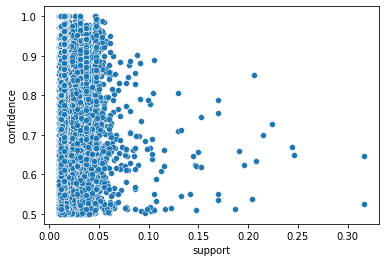

In [30]:
# cek scatterplot
sns.scatterplot('support','confidence', data=rules)

In [31]:
# filter rules dengan support >= 0.1 dan confidence >= 0.6
selected_rules = rules[(rules['support'] >= 0.1) & (rules['confidence'] >= 0.6)]

In [32]:
selected_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1164,"(Celana Jeans Sobek Wanita, Tali Pinggang Gesp...",(Shampo Biasa),0.118261,0.601449,0.105217,0.889706,1.479270,0.034089,3.613527
39,(Celana Jeans Sobek Wanita),(Shampo Biasa),0.241739,0.601449,0.206087,0.852518,1.417440,0.060693,2.702368
392,"(Sepatu Sandal Anak, Baju Batik Wanita)",(Serum Vitamin),0.129855,0.488406,0.104638,0.805804,1.649865,0.041216,2.634416
108,(Tas Waist Bag),(Serum Vitamin),0.161159,0.488406,0.129855,0.805755,1.649766,0.051144,2.633763
2075,"(Sepatu Sandal Anak, Serum Vitamin)",(Shampo Biasa),0.215072,0.601449,0.169275,0.787062,1.308609,0.039920,1.871675
394,"(Sepatu Sandal Anak, Baju Batik Wanita)",(Shampo Biasa),0.129855,0.601449,0.101159,0.779018,1.295235,0.023058,1.803543
2076,"(Sepatu Sandal Anak, Shampo Biasa)",(Serum Vitamin),0.223768,0.488406,0.169275,0.756477,1.548869,0.059986,2.100802
405,"(Baju Batik Wanita, Serum Vitamin)",(Shampo Biasa),0.204348,0.601449,0.152464,0.746099,1.240502,0.029559,1.569711
94,(Sepatu Sandal Anak),(Shampo Biasa),0.307826,0.601449,0.223768,0.726930,1.208631,0.038626,1.459520
818,"(Baju Kemeja Putih, Serum Vitamin)",(Shampo Biasa),0.186667,0.601449,0.132754,0.711180,1.182444,0.020483,1.379928


In [33]:
selected_rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,(Serum Vitamin),(Shampo Biasa),0.488406,0.601449,0.316232,0.647478,1.076529,0.022481,1.130569
10,(Baju Batik Wanita),(Shampo Biasa),0.380290,0.601449,0.246377,0.647866,1.077175,0.017652,1.131815
25,(Baju Kemeja Putih),(Shampo Biasa),0.363768,0.601449,0.243768,0.670120,1.114175,0.024980,1.208167
94,(Sepatu Sandal Anak),(Shampo Biasa),0.307826,0.601449,0.223768,0.726930,1.208631,0.038626,1.459520
93,(Sepatu Sandal Anak),(Serum Vitamin),0.307826,0.488406,0.215072,0.698682,1.430535,0.064728,1.697853
41,(Celana Jogger Casual),(Shampo Biasa),0.329275,0.601449,0.208406,0.632923,1.052329,0.010363,1.085740
39,(Celana Jeans Sobek Wanita),(Shampo Biasa),0.241739,0.601449,0.206087,0.852518,1.417440,0.060693,2.702368
51,(Cover Koper),(Shampo Biasa),0.314783,0.601449,0.195942,0.622468,1.034946,0.006616,1.055673
112,(Tali Pinggang Gesper Pria),(Shampo Biasa),0.290725,0.601449,0.191304,0.658026,1.094067,0.016448,1.165441
2076,"(Sepatu Sandal Anak, Shampo Biasa)",(Serum Vitamin),0.223768,0.488406,0.169275,0.756477,1.548869,0.059986,2.100802


Kita temukan bahwa Shampo Biasa dan Serum Vitamin sering menjadi consequents dengan confidence yang tinggi. Insight ini bisa kita manfaatkan untuk berbagai strategi promosi.

## Analisis terhadap suatu produk tertentu

In [34]:
frequent_itemsets = apriori(data_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

Misal kita ingin mencari suatu frequent items dan association rules yang berkaitan dengan produk Hair Dryer

In [35]:
frequent_itemsets_hairdryer = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: 'Hair Dryer' in x)]
frequent_itemsets_hairdryer.sort_values('support', ascending=False)

,support,itemsets
27,0.237971,(Hair Dryer)
914,0.148116,"(Hair Dryer, Shampo Biasa)"
912,0.122609,"(Serum Vitamin, Hair Dryer)"
124,0.093913,"(Baju Batik Wanita, Hair Dryer)"
908,0.090435,"(Sepatu Sandal Anak, Hair Dryer)"
...,...,...
6117,0.010145,"(Kaos, Baju Batik Wanita, Hair Dryer, Shampo B..."
6116,0.010145,"(Hair Dryer, Baju Batik Wanita, Jeans Jumbo, S..."
8607,0.010145,"(Serum Vitamin, Dompet Card Holder, Sepatu San..."
3154,0.010145,"(Celana Jeans Sobek Wanita, Celana Pendek Jean..."


In [36]:
# Hair Dryer sebagai antecedents
rules_hairdryer_1 = rules[rules['antecedents'].apply(lambda x: 'Hair Dryer' in x)]
rules_hairdryer_1.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
70,(Hair Dryer),(Shampo Biasa),0.237971,0.601449,0.148116,0.622412,1.034853,0.004988,1.055517
69,(Hair Dryer),(Serum Vitamin),0.237971,0.488406,0.122609,0.515225,1.054912,0.006382,1.055324
1881,"(Hair Dryer, Shampo Biasa)",(Serum Vitamin),0.148116,0.488406,0.076232,0.514677,1.053790,0.003891,1.054132
1880,"(Serum Vitamin, Hair Dryer)",(Shampo Biasa),0.122609,0.601449,0.076232,0.621749,1.033752,0.002489,1.053668
349,"(Baju Batik Wanita, Hair Dryer)",(Shampo Biasa),0.093913,0.601449,0.062319,0.663580,1.103302,0.005835,1.184683
...,...,...,...,...,...,...,...,...,...
10269,"(Celana Jeans Sobek Wanita, Serum Vitamin, Hai...",(Shampo Biasa),0.012464,0.601449,0.010145,0.813953,1.353320,0.002649,2.142210
9431,"(Baju Kemeja Putih, Celana Jogger Casual, Seru...",(Shampo Biasa),0.016232,0.601449,0.010145,0.625000,1.039157,0.000382,1.062802
10270,"(Celana Jeans Sobek Wanita, Shampo Biasa, Hair...",(Serum Vitamin),0.017391,0.488406,0.010145,0.583333,1.194362,0.001651,1.227826
8645,"(Sepatu Sandal Anak, Dompet Card Holder, Baju ...",(Serum Vitamin),0.014493,0.488406,0.010145,0.700000,1.433234,0.003067,1.705314


In [37]:
# Hair Dryer sebagai consequents
rules_hairdryer_1 = rules[rules['consequents'].apply(lambda x: 'Hair Dryer' in x)]
rules_hairdryer_1.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1613,"(Sepatu Sandal Anak, Dompet Card Holder)",(Hair Dryer),0.075072,0.237971,0.038841,0.517375,2.174107,0.020976,1.578924
1863,"(Sepatu Kulit Casual, Serum Vitamin)",(Hair Dryer),0.048696,0.237971,0.029275,0.601190,2.526318,0.017687,1.910759
1845,"(Hair and Scalp, Sepatu Kulit Casual)",(Hair Dryer),0.031884,0.237971,0.025217,0.790909,3.323552,0.017630,3.644486
7008,"(Sepatu Kulit Casual, Serum Vitamin)","(Hair and Scalp, Hair Dryer)",0.048696,0.063768,0.024638,0.505952,7.934253,0.021532,1.895024
7007,"(Hair and Scalp, Sepatu Kulit Casual)","(Serum Vitamin, Hair Dryer)",0.031884,0.122609,0.024638,0.772727,6.302386,0.020728,3.860522
...,...,...,...,...,...,...,...,...,...
9571,"(Baju Kemeja Putih, Kuas Makeup )","(Minyak Rambut, Hair Dryer, Dompet Flip Cover)",0.018261,0.017101,0.010435,0.571429,33.414044,0.010122,2.293430
9572,"(Minyak Rambut, Kuas Makeup )","(Baju Kemeja Putih, Hair Dryer, Dompet Flip Co...",0.014783,0.024638,0.010435,0.705882,28.650519,0.010071,3.316232
10698,"(Hair and Scalp, Sepatu Kulit Casual, Serum Vi...",(Hair Dryer),0.011594,0.237971,0.010435,0.900000,3.781973,0.007676,7.620290
10702,"(Hair and Scalp, Sepatu Kulit Casual, Shampo B...","(Serum Vitamin, Hair Dryer)",0.014203,0.122609,0.010435,0.734694,5.992184,0.008693,3.307090


# Visualisasi Output

In [38]:
frequent_itemsets = apriori(data_sets, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[rules['lift'] > 1]

In [39]:
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 15)

In [40]:
str(frequent_itemsets['itemsets'])

'0                                    (Atasan Kaos Putih)\n1                                    (Baju Batik Wanita)\n2                     (Baju Kaos Anak - Karakter Kartun)\n3                         (Baju Kaos Anak - Superheroes)\n4                                    (Baju Kemeja Putih)\n                             ...                        \n98      (Baju Kemeja Putih, Serum Vitamin, Shampo Biasa)\n99     (Celana Jeans Sobek Wanita, Tali Pinggang Gesp...\n100    (Celana Jogger Casual, Serum Vitamin, Shampo B...\n101           (Serum Vitamin, Cover Koper, Shampo Biasa)\n102    (Sepatu Sandal Anak, Serum Vitamin, Shampo Biasa)\nName: itemsets, Length: 103, dtype: object'

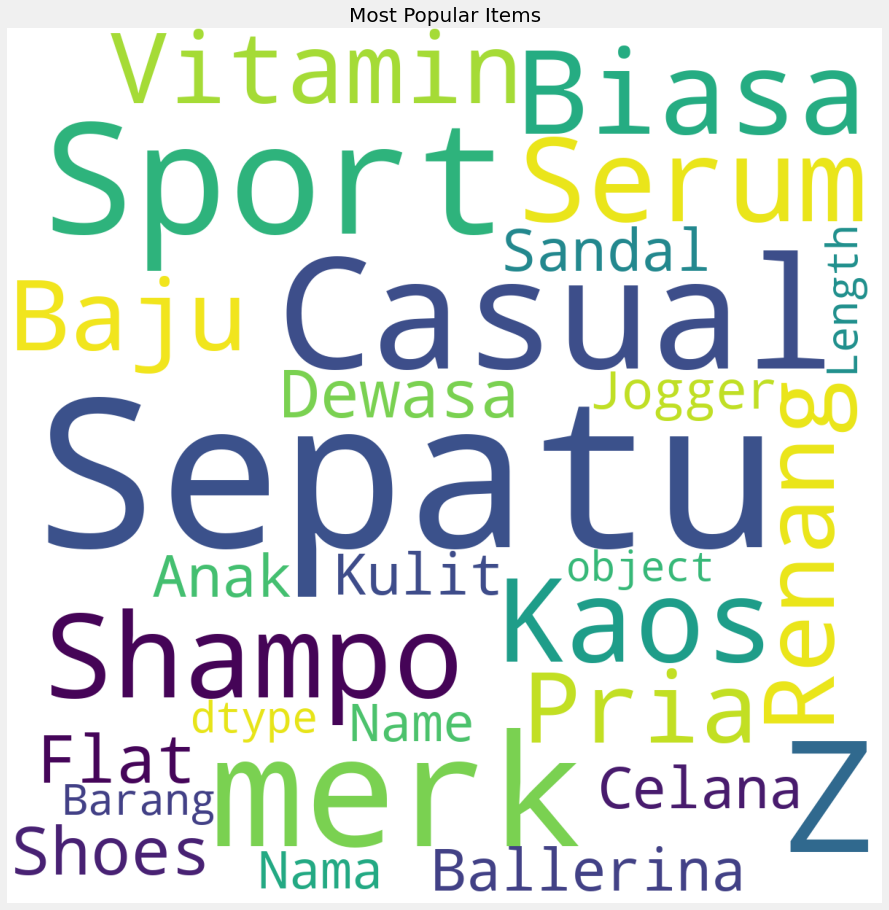

In [41]:
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data['Nama Barang']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [42]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Baju Batik Wanita),(Shampo Biasa),0.380290,0.601449,0.246377,0.647866,1.077175,0.017652,1.131815
1,(Baju Kemeja Putih),(Shampo Biasa),0.363768,0.601449,0.243768,0.670120,1.114175,0.024980,1.208167
2,(Blouse Denim),(Shampo Biasa),0.182319,0.601449,0.129275,0.709062,1.178922,0.019620,1.369882
3,(Celana Jeans Sobek Wanita),(Shampo Biasa),0.241739,0.601449,0.206087,0.852518,1.417440,0.060693,2.702368
4,(Celana Jogger Casual),(Shampo Biasa),0.329275,0.601449,0.208406,0.632923,1.052329,0.010363,1.085740
5,(Celana Pendek Casual),(Shampo Biasa),0.185217,0.601449,0.112754,0.608764,1.012161,0.001355,1.018696
6,(Celana Pendek Jeans),(Shampo Biasa),0.235072,0.601449,0.146667,0.623921,1.037363,0.005283,1.059753
7,(Celana Tactical ),(Shampo Biasa),0.175072,0.601449,0.115652,0.660596,1.098340,0.010355,1.174267
8,(Cover Koper),(Shampo Biasa),0.314783,0.601449,0.195942,0.622468,1.034946,0.006616,1.055673
9,(Dompet Card Holder),(Shampo Biasa),0.223768,0.601449,0.144928,0.647668,1.076846,0.010342,1.131181


In [43]:
list(rules)

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']